#  Loan Data from Prosper

##  Data Wrangling
This part of the project focuses on on exploring loan data containing 113,937 loans with 81 variables on each loan.

## Goals.
The goal of this project is to communicate the data finding from the dataset.
Some of the questions that will help us do the analysis and visualizations are listed below.


In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
#import the libraries to be used.
import pandas as pd
%matplotlib inline
import numpy as np
import requests
from matplotlib import pyplot as plt
from matplotlib import rcParams as rP
import seaborn as sns
import os

## Assessing the data

In [3]:
# Read CSV (comma-separated) file into DataFrame usind pandas
df = pd.read_csv('prosperLoanData.csv')

In [4]:
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
df[df['GroupKey'].isnull()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [8]:
#List types of loan status available.
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [9]:
#Check for the duplicates in the dataset
df.duplicated().sum()

0

In [10]:
#Check for the duplicated ListingNumber in the dataset
df['ListingNumber'].duplicated().sum()

871

In [11]:
#Check for the duplicated ListingKey in the dataset
df[df.ListingKey.duplicated()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.17710,0.1535,0.1435,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2539,2D2635984503681189056B4,1097584,2014-01-11 07:50:08.037000000,NaN,60,Current,NaN,0.14528,0.1224,0.1124,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4942,4B7E3590031274113F1FD34,927246,2013-09-26 09:35:36.317000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,-15.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,40
5812,94B035909835592957503E6,920397,2013-09-24 13:27:48.287000000,NaN,36,Current,NaN,0.24205,0.2045,0.1945,...,-37.03,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113548,FB6A35999320129979DBBA3,1158474,2014-01-23 14:33:25.967000000,NaN,60,Current,NaN,0.22063,0.1960,0.1860,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113636,D9BF3589576999233477E75,904020,2013-09-17 11:44:43.177000000,NaN,36,Current,NaN,0.21290,0.1760,0.1660,...,-9.86,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113733,E2303594522341016B8EE15,1002326,2013-11-07 14:26:31.317000000,NaN,60,Current,NaN,0.20593,0.1819,0.1719,...,-24.94,0.0,0.0,0.0,0.0,1.0,0,0,0.0,66
113773,DE8535960513435199406CE,1056749,2013-12-06 05:43:13.830000000,NaN,36,Current,NaN,0.16324,0.1274,0.1174,...,-16.79,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [12]:
#Checking the first 5 rows of the dataset.
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [13]:
#Checking the last 5 rows of the dataset.
df.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [14]:
len(df['ListingKey'].unique())

113066

In [15]:
#Checking 60 random rows for any issues in the dataset
df.sample(60)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
91571,73C43375624778257AACDA9,74585,2006-12-14 09:49:32.863000000,HR,36,Defaulted,2007-08-25 00:00:00,0.20735,0.2000,0.1950,...,-4.83,0.00,3747.44,3747.44,0.00,1.0,0,0,0.0,124
107507,14FC338080396111148952E,89296,2007-01-26 16:14:42.340000000,E,36,Chargedoff,2008-06-09 00:00:00,0.26270,0.2551,0.2401,...,-17.30,-80.06,3997.29,3991.66,0.00,1.0,0,0,0.0,65
42739,9FA83540110865786C40000,560758,2012-02-19 22:57:55.180000000,NaN,36,Completed,2013-07-10 00:00:00,0.12782,0.0999,0.0899,...,-49.44,0.00,0.00,0.00,0.00,1.0,0,0,0.0,85
42571,4DCA35870028500553C8DBE,879036,2013-08-25 00:39:53.893000000,NaN,60,Current,NaN,0.23462,0.2099,0.1999,...,-73.40,0.00,0.00,0.00,0.00,1.0,0,0,0.0,45
2475,27DC3499800845582383D0A,485104,2010-11-19 09:17:21.910000000,NaN,36,Completed,2013-12-01 00:00:00,0.19158,0.1490,0.1390,...,-21.40,0.00,0.00,0.00,0.00,1.0,0,0,0.0,35
87937,A1763550410082719B07A28,600686,2012-06-17 06:50:49.240000000,NaN,36,Chargedoff,2012-12-26 00:00:00,0.35797,0.3177,0.3077,...,-4.60,0.00,3987.52,3987.52,0.00,1.0,0,0,0.0,3
107752,21723577163943161E45768,753778,2013-04-15 12:15:21.547000000,NaN,60,Current,NaN,0.14453,0.1219,0.1119,...,-158.23,0.00,0.00,0.00,0.00,1.0,0,0,0.0,1
85464,22723545372964252E84A1E,584411,2012-04-30 19:21:49.537000000,NaN,36,Current,NaN,0.35797,0.3177,0.3077,...,-56.13,0.00,0.00,0.00,0.00,1.0,0,0,0.0,82
57685,80763558473650231097023,639151,2012-09-12 20:56:17.443000000,NaN,36,Current,NaN,0.35797,0.3177,0.3077,...,-47.91,0.00,0.00,0.00,0.00,1.0,0,0,0.0,62
44492,DC623417498118035AA1B99,304426,2008-04-04 13:03:04.410000000,C,36,Completed,2008-11-17 00:00:00,0.24771,0.2250,0.2150,...,-25.62,0.00,0.00,0.00,0.00,1.0,0,0,0.0,65


In [16]:
df.iloc[:, 2]

0         2007-08-26 19:09:29.263000000
1         2014-02-27 08:28:07.900000000
2         2007-01-05 15:00:47.090000000
3         2012-10-22 11:02:35.010000000
4         2013-09-14 18:38:39.097000000
                      ...              
113932    2013-04-14 05:55:02.663000000
113933    2011-11-03 20:42:55.333000000
113934    2013-12-13 05:49:12.703000000
113935    2011-11-14 13:18:26.597000000
113936    2014-01-15 09:27:37.657000000
Name: ListingCreationDate, Length: 113937, dtype: object

In [17]:
df.ListingCreationDate.value_counts()

2013-10-02 17:20:16.550000000    6
2013-08-28 20:31:41.107000000    4
2013-09-08 09:27:44.853000000    4
2013-12-06 11:44:58.283000000    4
2013-12-06 05:43:13.830000000    4
                                ..
2013-12-20 16:29:35.667000000    1
2008-06-03 17:40:16.807000000    1
2007-04-25 11:06:01.370000000    1
2012-05-01 07:18:05.273000000    1
2014-01-15 09:27:37.657000000    1
Name: ListingCreationDate, Length: 113064, dtype: int64

In [18]:
#checking for null values in the data set 
df.isnull()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113933,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113934,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113935,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
#Checking number of NAs in the dataset
df.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [20]:
df['Term'].unique()

array([36, 60, 12])

In [21]:
#Splitting listing creation year into months date
df[['ListingCreationYear','ListingCreationDateMonth','ListingCreationDateDate']]=df['ListingCreationDate'].str.split('-', expand=True);
df


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCreationYear,ListingCreationDateMonth,ListingCreationDateDate
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,1.0,0,0,0.0,258,2007,08,26 19:09:29.263000000
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,1.0,0,0,0.0,1,2014,02,27 08:28:07.900000000
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,1.0,0,0,0.0,41,2007,01,05 15:00:47.090000000
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,1.0,0,0,0.0,158,2012,10,22 11:02:35.010000000
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,1.0,0,0,0.0,20,2013,09,14 18:38:39.097000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,0.0,0.0,1.0,0,0,0.0,1,2013,04,14 05:55:02.663000000
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,0.0,0.0,1.0,0,0,0.0,22,2011,11,03 20:42:55.333000000
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,0.0,0.0,1.0,0,0,0.0,119,2013,12,13 05:49:12.703000000
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,0.0,0.0,1.0,0,0,0.0,274,2011,11,14 13:18:26.597000000


In [22]:
#check for success
df.ListingCreationYear.value_counts()

2013    35413
2012    19556
2007    11557
2011    11442
2008    11263
2014    10734
2006     6213
2010     5530
2009     2206
2005       23
Name: ListingCreationYear, dtype: int64

In [23]:
#Checking the different ListingCreationYear recorded.
df['ListingCreationYear'].unique()

array(['2007', '2014', '2012', '2013', '2006', '2010', '2011', '2008',
       '2009', '2005'], dtype=object)

In [24]:
#Checking the different employment status recorded.
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [25]:
df.LoanOriginationQuarter.value_counts()

Q4 2013    14450
Q1 2014    12172
Q3 2013     9180
Q2 2013     7099
Q3 2012     5632
Q2 2012     5061
Q1 2012     4435
Q4 2012     4425
Q2 2008     4344
Q4 2011     3913
Q1 2013     3616
Q3 2008     3602
Q2 2007     3118
Q3 2011     3093
Q1 2007     3079
Q1 2008     3074
Q3 2007     2671
Q4 2007     2592
Q2 2011     2478
Q4 2006     2403
Q3 2006     1934
Q1 2011     1744
Q4 2010     1600
Q2 2010     1539
Q4 2009     1449
Q3 2010     1270
Q2 2006     1254
Q1 2010     1243
Q3 2009      585
Q4 2008      532
Q1 2006      315
Q4 2005       22
Q2 2009       13
Name: LoanOriginationQuarter, dtype: int64

In [26]:
df[df['CreditScoreRangeLower'].isnull()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCreationYear,ListingCreationDateMonth,ListingCreationDateDate
206,2EB933650172111114C843E,3509,2006-03-25 13:09:11.680000000,D,36,Defaulted,2007-06-29 00:00:00,0.27767,0.2700,0.2575,...,6022.49,0.0,1.0,0,0,0.0,57,2006,03,25 13:09:11.680000000
387,09A833656549997602264C7,1105,2006-03-02 17:49:16.430000000,B,36,Completed,2006-10-04 00:00:00,0.09337,0.0865,0.0815,...,0.00,0.0,1.0,0,0,0.0,51,2006,03,02 17:49:16.430000000
698,00BA3364778959938EDA750,137,2006-02-07 12:01:25.260000000,AA,36,Completed,2006-04-26 00:00:00,0.07680,0.0700,0.0650,...,0.00,0.0,1.0,0,0,0.0,10,2006,02,07 12:01:25.260000000
1023,357433648518369759061C7,4343,2006-03-30 11:08:08.503000000,AA,36,Completed,2006-05-16 00:00:00,0.08684,0.0800,0.0750,...,0.00,0.0,1.0,0,0,0.0,51,2006,03,30 11:08:08.503000000
1126,43D03365506791463BE5D2A,1908,2006-03-13 10:45:16.130000000,C,36,Completed,2006-04-03 00:00:00,0.20735,0.2000,0.1950,...,0.00,0.0,1.0,0,0,0.0,12,2006,03,13 10:45:16.130000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112680,DC813364854588550A92223,339,2006-02-15 09:58:53.623000000,D,36,Chargedoff,2008-07-21 00:00:00,0.14458,0.1375,0.1250,...,2276.89,0.0,1.0,0,0,0.0,15,2006,02,15 09:58:53.623000000
113015,EA353364765739825E3CE7F,4861,2006-04-03 20:54:49.090000000,B,36,Completed,2006-07-24 00:00:00,0.12700,0.1200,0.1150,...,0.00,0.0,1.0,0,0,0.0,88,2006,04,03 20:54:49.090000000
113438,F60733644194583537B6146,363,2006-02-15 15:17:54.273000000,B,36,Completed,2009-03-02 00:00:00,0.08684,0.0800,0.0700,...,0.00,0.0,1.0,0,0,0.0,9,2006,02,15 15:17:54.273000000
113902,E6D13366465509973F5E90A,3579,2006-03-26 00:11:04.620000000,A,36,Completed,2006-05-24 00:00:00,0.08805,0.0812,0.0750,...,0.00,0.0,1.0,0,0,0.0,143,2006,03,26 00:11:04.620000000


In [27]:
df['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

### Identified issues in the dataset
- Missing data
- Presence of unnecessary columns
- Presence of duplicates
- The dates columns combine the year, month, day and hour all at once
- Have a non-uniform data for 'Employment Status' column

### Define the questions.
1. How long did most individuals take to repay the loans?
2. Which year did did we have the highest borrowing?
3. Which employment status group take most loans?
4. How are the listings distributed in terms of loan status?
5. What is the distribution of the original loan amount on listings?
6. Does the original loan amount have any impact on the monthly payment?
7. How does the number of investors on a loan affect the original loan amount given to borrowers?
8. Does having investors and the original loan amount have any impact on the loan status of a borrower?
9. Does the period of employment affect the term of the loan?
10. In which year did we have most listings with borrowers who have the longest employment duration?
11. How does factors such as 'Currently In Group',"Prosper Rating (Alpha)",'Employment Status', 'Loan Status', 'Listing Creation Year','Prosper Score' and home owning affect the number of listing
12. How does the employment status on borrowers who own a home and those who don't affect the loan original amount?
13. Are most borrower who are home owners currently in a group? Do they also have an income that is verifiable?
14. Does the term of the loan determine its payment success
15. Most defaulters are in which term?
16. Which quarter of the year has highest borrowing and highest loan payment.

## ExploratoryAnalysis

In [28]:
year_order = df['ListingCreationYear'].value_counts().index

In [29]:
#create functions for the graphs
def labler_fn(xaxis, yaxis, title):
    xaxis = plt.xlabel(xaxis)
    yaxis = plt.ylabel(yaxis)
    title = plt.title(title)
    

base_color = sns.color_palette()[0]

#A fanction for creating a bar graph.
def bar(x, y, xaxis, yaxis, title):
    plt.bar(x, y,)
    labler_fn(xaxis, yaxis, title)
plt.show()

#A fanction for creating a histogram graph.
def hist(x, xaxis, yaxis, title):
    plt.hist(x)
    labler_fn(xaxis, yaxis, title)
plt.show()


#Arranging prosper rating and listing creation year from least to most to assist in easy interpretation of the graphs
df["ProsperRating (Alpha)"] = pd.Categorical(df["ProsperRating (Alpha)"], categories=['HR','E','D','C','B','A','AA'],ordered=True)
df['ListingCreationYear'] = pd.Categorical(df['ListingCreationYear'], categories=['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'],ordered=True)


### Univariant relationship

###### 4. How are the listings distributed in terms of loan status?

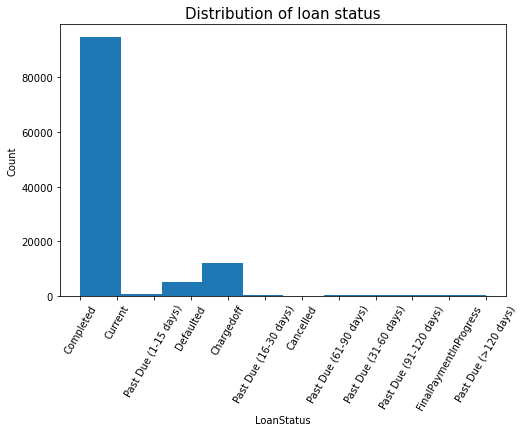

In [30]:
#plot a histogram to show the distribution of loan status.
plt.figure(figsize = (8,5));
hist(df.LoanStatus, 'LoanStatus', 'Count', 'Count of loan status')
plt.title('Distribution of loan status',fontsize = 15);
plt.xticks(rotation=60);

##### 1. How long did most individuals take to repay the loans?
##### 2. Which year did did we have the highest borrowing?
##### 3. Which employment status group take most loans?


In [31]:
items = ['ListingCreationYear',"Term",'EmploymentStatus']


In [32]:
list(enumerate(items))


[(0, 'ListingCreationYear'), (1, 'Term'), (2, 'EmploymentStatus')]

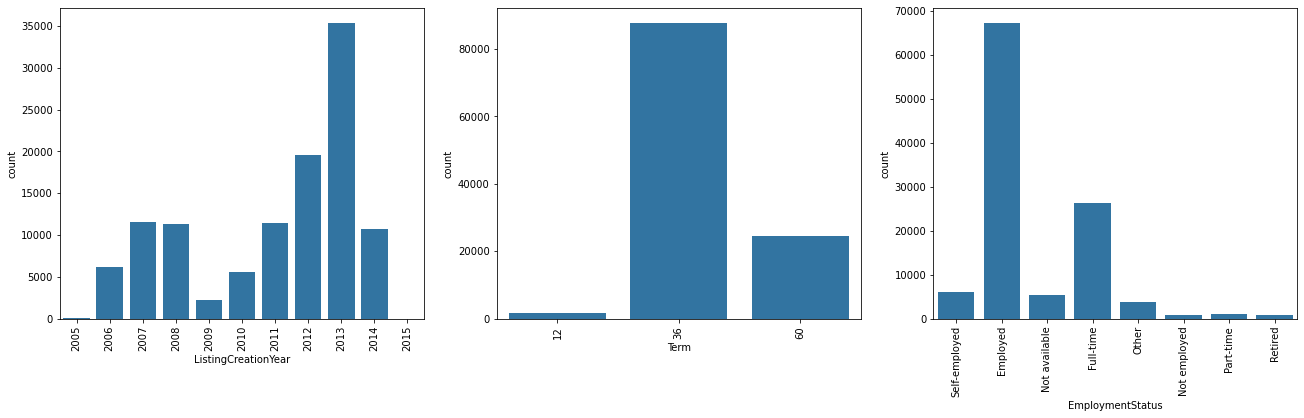

In [33]:
#Plot a subplot for ListingCreationYear,Term AND EmploymentStatus
plt.figure(figsize = (30, 40));
for i in enumerate(items):
    plt.subplot(6, 4,i[0]+1)
    sns.countplot(i[1], data = df, color = base_color);
    plt.xticks(rotation = 90);

###### First graph.
The graph shows the total amount of listing in every year and it turns out that the highest number of listings were made in 2013. The trend in the graphs shows a steady increase in the listings from 2006 to 2008, then a drop in 2009, after which it picks up with a steady rise in till 2013. The listings creation had a drastic drop from 2013 to 2014.

###### second graph.
The loans were given out for 3 different periods, they included 12 months term, 36 months term and 60 months term. From the 2nd graph, we can tell that most loans given out had a term period of 36 months which is three years. 12 months term had the least borrowings.
 
###### Third graph.
The 3rd graph, farthest right shows that the highest number of borrowers during the defined period were employed, the lowest number were unemployed while the rest did not define their employment status.

###### Most loan status fall between completed and current, while canceled has the least number

##### 5. What is the distribution of the original loan amount on listings?


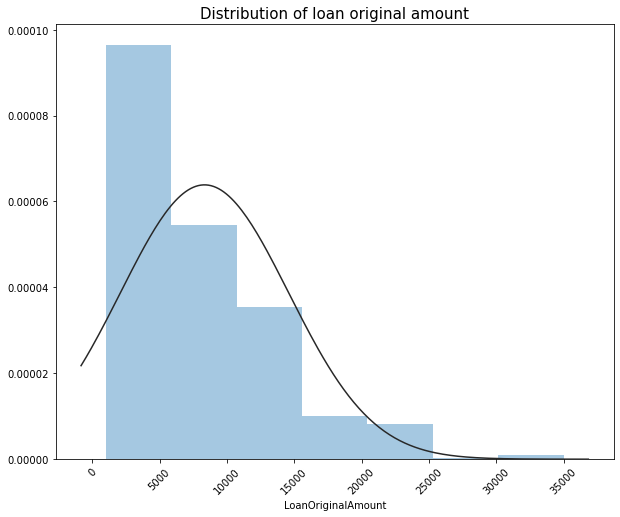

In [34]:
#Plot a distplot to show the distribution of loan amouts.
plt.figure(figsize = (10, 8));
from scipy.stats import norm
sns.distplot(df['LoanOriginalAmount'], bins=7, kde=False, fit=norm);
plt.title('Distribution of loan original amount',fontsize = 15);
plt.xticks(rotation=45);


##### High number of listings are done in original loan amounts of 2500 to 25000. It is also important to note that the highest distribution listings are between the original loan amounts of 2500 and 5000, the least distribution falls between the values of 25000 and 35000.

### Bivariant relationship

##### Which quarter of the year had the highest amount of loan borrowed and how does the loan payment term period relate to quarter?

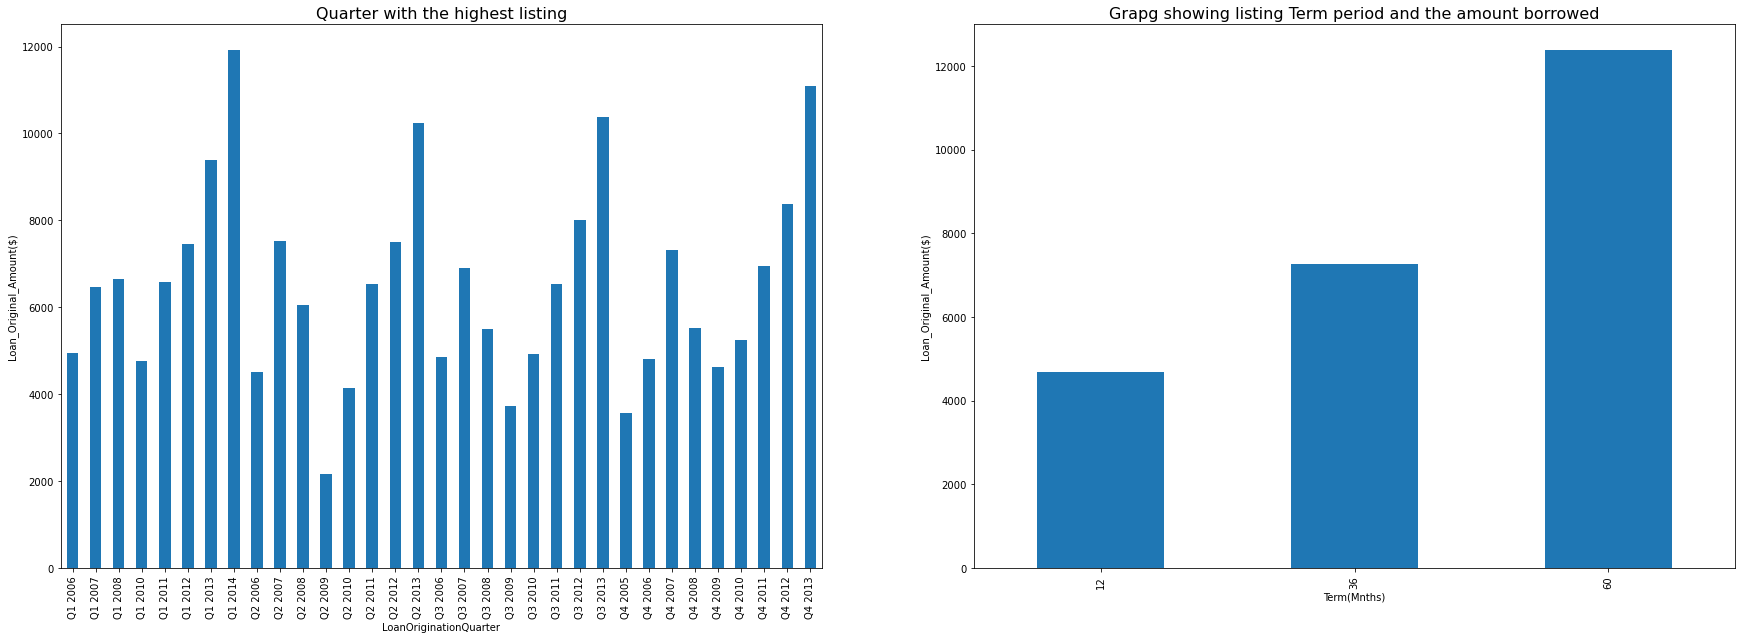

In [35]:
#Left plot
# Plot a bar graph
plt.figure(figsize = (30, 10));
plt.subplot(1, 2, 1)
df.groupby('LoanOriginationQuarter').LoanOriginalAmount.mean().plot(kind='bar')
plt.ylabel('Loan_Original_Amount($)');
plt.title('Quarter with the highest listing', fontsize = 16);

#Right plot
#Plot a graph to show how loan amount relates to the term of borrowing
plt.subplot(1, 2, 2)
df.groupby('Term').LoanOriginalAmount.mean().plot(kind='bar');
plt.xlabel("Term(Mnths)");
plt.ylabel('Loan_Original_Amount($)')
plt.title('Grapg showing listing Term period and the amount borrowed', fontsize = 16);

##### From the above graphs, we can tell that most listing, happened in quarter 1 followed by quarter 4, translating into the beginning and end of every year, quarter 2 and 3 had almost the same amount of listing with quarter 3 being slightly higher and the second graph brings in the aspect of the payment term period. It is evident that highest amount of original loan amount borrowed had a listing term of 60 months. There for huge amounts of loans were listed in the Q1 &Q2 with a payment Term period of 60 months. On the other hand it is safe to say that lower huge amount of loans were taken in the middle of the year with a term period of 12 moths.

###### 6. Does the original loan amount have any impact on the monthly payment?


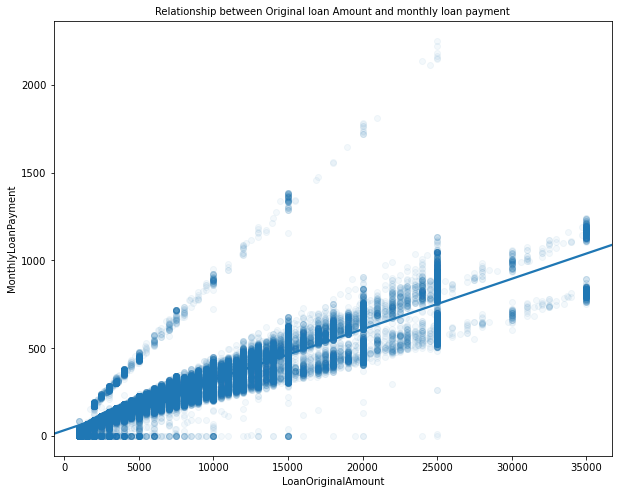

In [36]:
#Plot a graph showing relationship between 'original_loan_amount' and 'monthly_loan_amount'
plt.figure(figsize = (10, 8));
sns.regplot(df.LoanOriginalAmount,df.MonthlyLoanPayment, truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.title('Relationship between Original loan Amount and monthly loan payment', fontsize = 10);


###### From the above graph, we can deduce that monthly loan payment increased with an increase in original loan amount hence monthly loan payment is directly proportional to original loan amount. The higher the borrowing the higher the monthly payment.

###### 7. How does the number of investors on a loan affect the original loan amount given to borrowers?


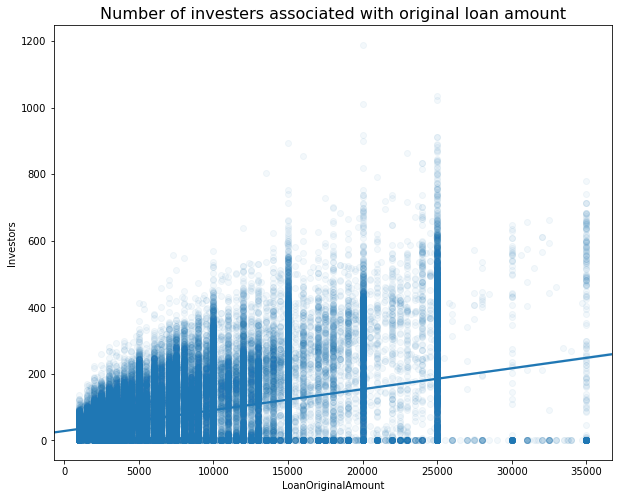

In [37]:
#Reggression plot relating number of investors to loan original amount
plt.figure(figsize = (10, 8));
sns.regplot(df.LoanOriginalAmount,df.Investors, truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.title('Number of investers associated with original loan amount',fontsize = 16);

##### The graph above depicts a rise in the original loan amount leads to a slight rise the number of investors. It is also important to note that more investors are associated with borrowers with lower original loan amounts, this is indicated by the concentration on the graph between 0 and 2500 USD, we have less investors with loans that are above 25000. The more loan you take the more like you wont have an investor.



##### 8. Does having investors and the original loan amount have any impact on the loan status of a borrower?


(11.5, -0.5)

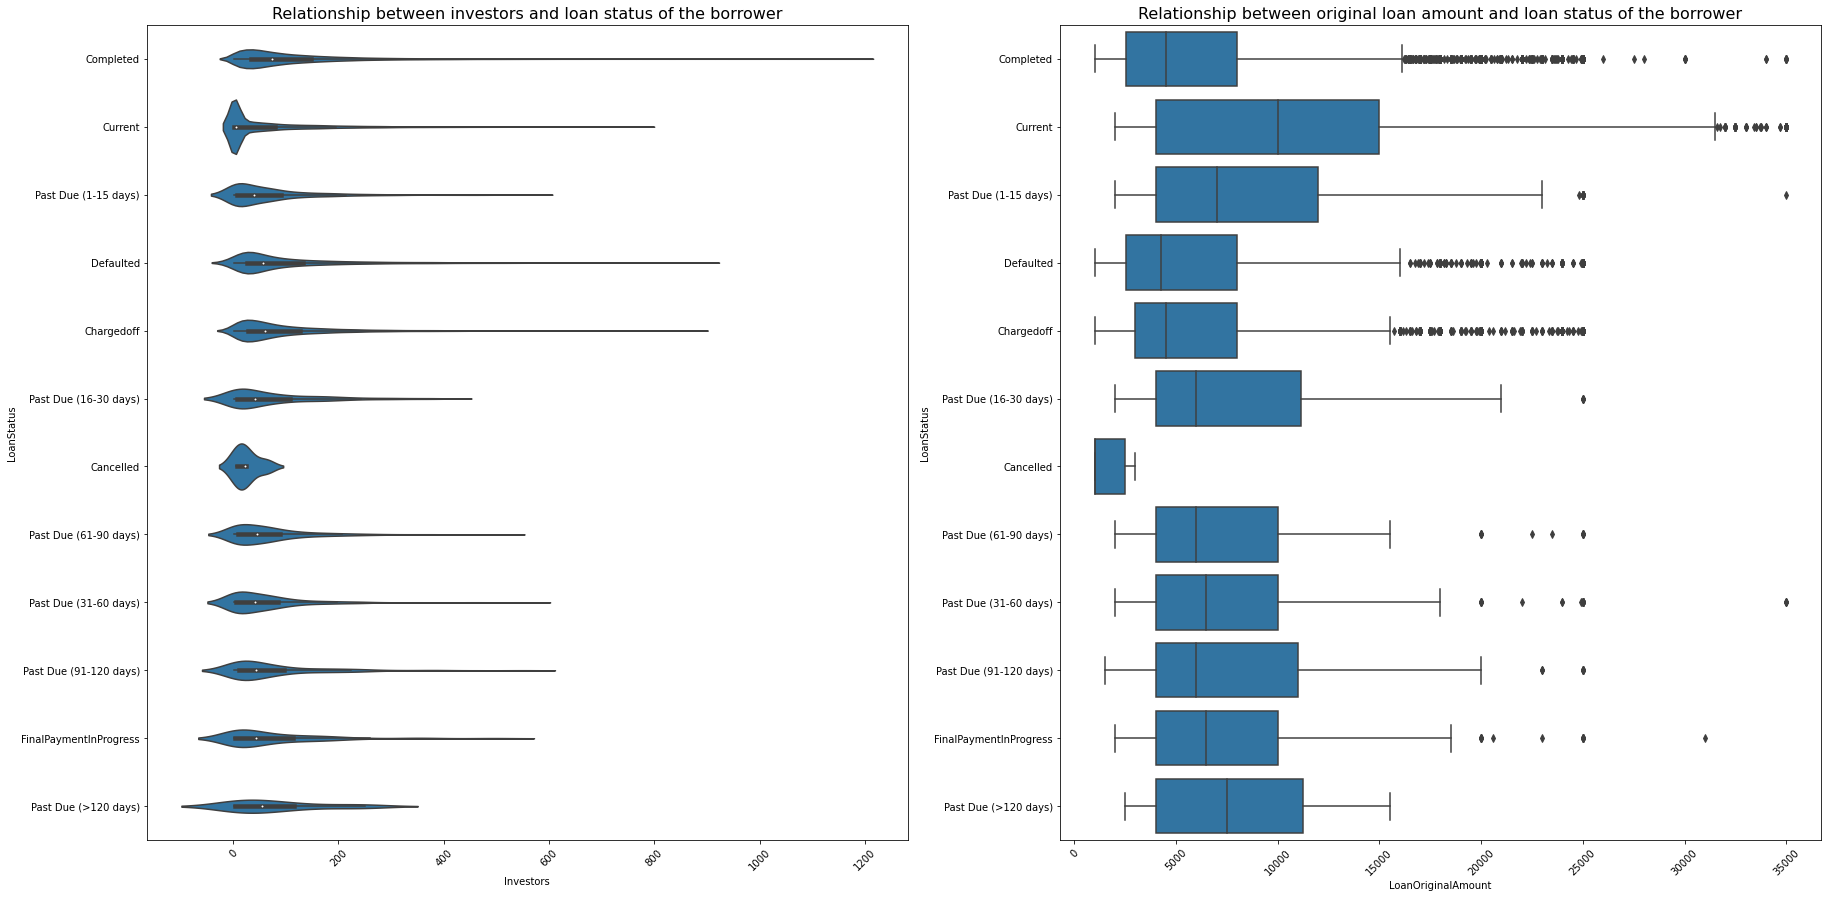

In [38]:
# Plot a violin plot
# set y-axis limits for both grapghs to be same.
# LEFT plot
plt.figure(figsize = (30, 15));
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data=df, y='LoanStatus', x='Investors', color=base_color);
plt.title('Relationship between investors and loan status of the borrower', fontsize = 16);
plt.xticks(rotation=45);

# RIGHT plot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='LoanStatus', x='LoanOriginalAmount', color=base_color);
plt.title('Relationship between original loan amount and loan status of the borrower',fontsize = 16);
plt.xticks(rotation=45);
plt.ylim(ax1.get_ylim()) 


###### Left graph 
Number of investors is almost the same for all loan status, except for completed which appears to be slightly higher than the rest.

###### Left graph 
The median original loan for the current status is the highest while canceled is the lowest. The median for defaulted and charged off loans are almost the same with the charged off being slightly higher. Though the current loan status has the highest data.

###### 9. Does the period of employment affect the term of the loan?


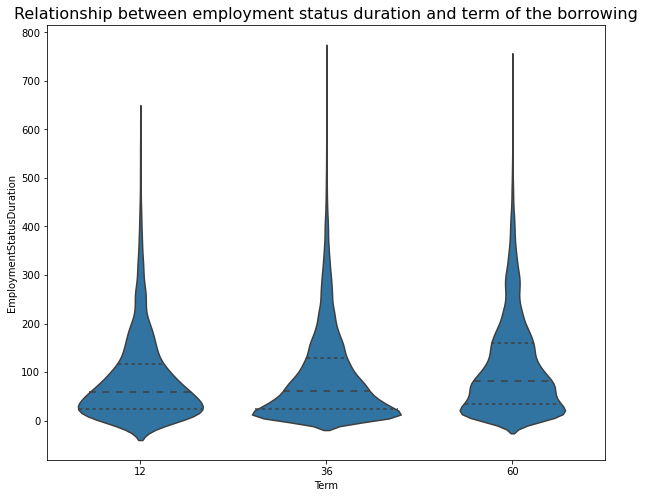

In [39]:
plt.figure(figsize = (10, 8));
sns.violinplot(data=df, y='EmploymentStatusDuration', x='Term', color=base_color, inner='quartile');
plt.title('Relationship between employment status duration and term of the borrowing',fontsize = 16);



###### The density of the employment status duration for all the 3 terms are below 200 but the 36 and 60 terms have the most outliers.


##### 10. In which year did we have most listings with borrowers who have the longest employment duration?

<Figure size 2880x1440 with 0 Axes>

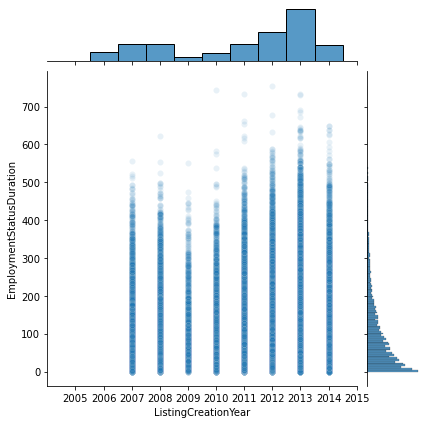

In [40]:
#Plot a graph showing the relation between Listing Creation Year and Employment Status Duration
plt.figure(figsize = (40, 20));
sns_plot=sns.jointplot(x='ListingCreationYear',y='EmploymentStatusDuration',data=df,kind='scatter', alpha = 1/10);
plt.xticks(rotation=45);

##### From the above graph more listings with people who have stayed longer in the employment sector was done in 2013 and we have less people who have the highest employment status duration borrowing. The distribution also shows more borrowers are ones with at most 200 months of employment duration and within the years of 2013 and 2014

### Multivariate Analysis

##### 11. Examine various factors and how they affect listings.

In [41]:
item = ['CurrentlyInGroup',"ProsperRating (Alpha)",'EmploymentStatus', 'LoanStatus', 'ListingCreationYear','ProsperScore']


In [42]:
list(enumerate(item))


[(0, 'CurrentlyInGroup'),
 (1, 'ProsperRating (Alpha)'),
 (2, 'EmploymentStatus'),
 (3, 'LoanStatus'),
 (4, 'ListingCreationYear'),
 (5, 'ProsperScore')]

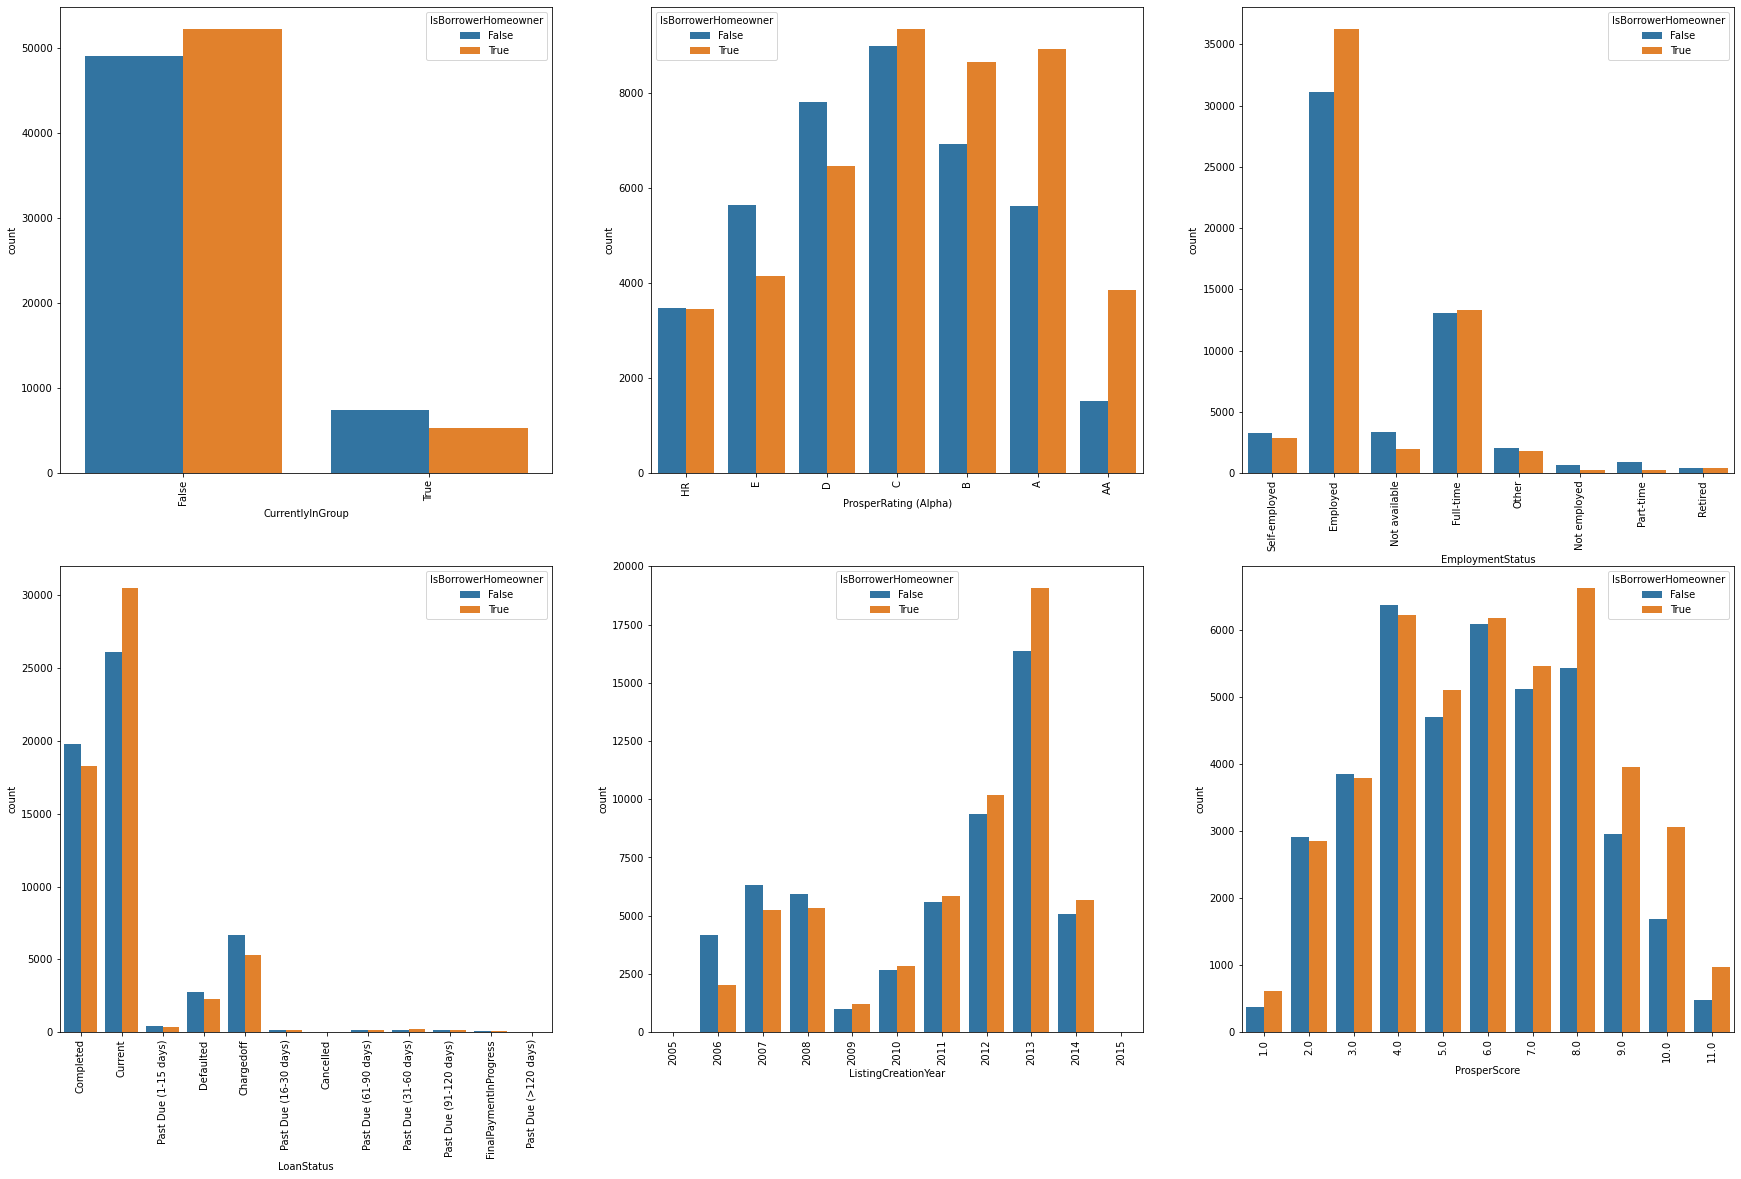

In [43]:
#Plot subplots relating 'CurrentlyInGroup',"ProsperRating (Alpha)",'EmploymentStatus', 'LoanStatus', 'ListingCreationYear','ProsperScore'
plt.figure(figsize = (30, 60));
for i in enumerate(item):
    plt.subplot(6, 3,i[0]+1)
    sns.countplot(i[1], hue = 'IsBorrowerHomeowner', data = df);
    plt.xticks(rotation = 90);
    

##### The above 6 graphs examine how the borrowers home owning status relates to other factors associated with borrowing.

##### 1st graph
The 1st graph relates home owning status and group membership of the borrowers.
It clearly shows that most borrowers don't belong to a group whether they own a home or not. The number of borrowers who are home owners is higher compared to borrowers who do not own a home for those who are not in a group, while the vice versa is true for those in groups, borrowers who do not own a home are more than borrowers who own a home for those in groups.

##### 2nd graph
Better prosper ratings i.e AA to B are dominated by home owners while  non-home owners more than the home owners as the ratings got worse. This means that home owners are better performers that those who do not own a home.

##### 3rd graph
More borrowers who are employed are home owner but the trend changes for the two categories of employment status, the unemployed and unidentified employment status, the number of borrowers for those who do not own a home are higher than those who own a home.

##### 4th graph
Most loan status fall between completed and current which means it is still active and withing the stipulated period while an insignificant loans are canceled.
Borrowers who do not own a home default from paying loans compared to home owners.
We also have charged off loans, which is more that the defaulted loan and most of it is comprised with individuals who are not home owners.

##### 5th graph
The graph shows that from 2005 to 2008 most people who took loans did not own a home but as time goes by, the wheels were turned and more home owner started taking loans compared to non-home owners.The number of borrowers also rose steadily  from 2009 to 2015 after which there was a drastic drop. But even with the drastic drop in the number of borrowers, home owners were still more in numbers compared to those who did not own homes.

##### 12. How does the employment status on borrowers who own a home and those who don't affect the loan original amount?

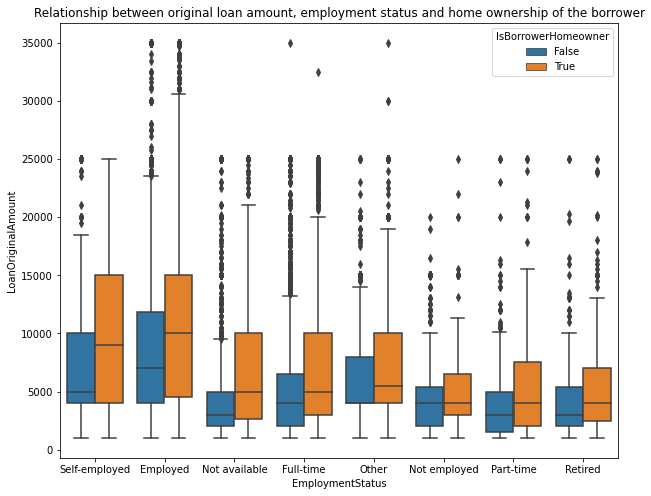

In [44]:
#A graph showing loan original amount, employment status and if the borrower is a home owner.
fig, axl=plt.subplots(figsize=(10,8))
test_plot=sns.boxplot(ax=axl, x="EmploymentStatus", y='LoanOriginalAmount', hue='IsBorrowerHomeowner', data=df)
plt.title('Relationship between original loan amount, employment status and home ownership of the borrower');


###### The median original loan amount for employed borrowers who home owners is higher that those who are not home owners, same case applies to individuals who's employment status is unidentified, while the median for original loan amount for unemployed borrowers is the same for both home owners and those who don't own homes.



##### 13. Are most borrower who are home owners currently in a group?
##### Do they also have an income that is verifiable?

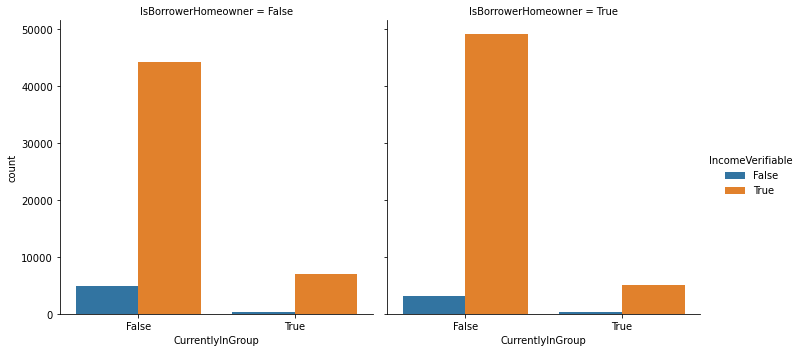

In [45]:
#Graph showing relationship between group membership , income verifiability and if the borrower is a home owner
sns.catplot(data=df, col='IsBorrowerHomeowner', x='CurrentlyInGroup', hue='IncomeVerifiable', kind='count');


###### The graph above shows that the highest number of borrowers are currently not in a group despite having a verifiable source of income for both home owners and none-home owners. People who are in groups, are not borrowing much, even though the one who have their income verifiable are more that the ones with non-verifiable income whether they are own a home or not.